I get from part 1 a list of points and to what object they belong
Ex of points:

In [393]:
import matplotlib.pyplot as plt
import random

#functions that checks if two line segments intersect

#function that defines the orientation of three given points
def compute_orientation(p1,p2,p3):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    orientation_value = (y2-y1)*(x3-x2)-(y3-y2)*(x2-x1)
    # Check for collinear, clockwise, or counterclockwise orientation
    if orientation_value == 0:
        return 0  # Collinear
    elif orientation_value > 0:
        return -1  # Clockwise orientation
    else:
        return 1  # Counterclockwise orientation

#For 3 collinear points a,b,c, we search if point c lies on segment ab    
def onSegment(a, b, c): 
    xa, ya = a
    xb, yb = b
    xc, yc = c
    if ( (xc <= max(xa, xb)) and (xc >= min(xa, yb)) and 
           (yc <= max(ya, yb)) and (yc >= min(ya, yb))): 
        return True
    return False

#function that checks if two line segments intersect
def intersect(p1,q1,p2,q2):
    xp1, yp1 = p1
    xq1, yq1 = q1
    xp2, yp2 = p2
    xq2, yq2 = p2

    o1=compute_orientation(p1,q1,p2)
    o2=compute_orientation(p1,q1,q2)
    o3=compute_orientation(p2,q2,p1)
    o4=compute_orientation(p2,q2,q1)

    # General case
    if o1 != o2 and o3 != o4:
        return True
    
    # p1 , q1 and p2 are collinear and p2 lies on segment p1q1 
    if ((o1 == 0) and onSegment(p1, q1, p2)): 
        return True
  
    # p1 , q1 and q2 are collinear and q2 lies on segment p1q1 
    if ((o2 == 0) and onSegment(p1, q1, q2)): 
        return True
  
    # p2 , q2 and p1 are collinear and p1 lies on segment p2q2 
    if ((o3 == 0) and onSegment(p2, q2, p1)): 
        return True
  
    # p2 , q2 and q1 are collinear and q1 lies on segment p2q2 
    if ((o4 == 0) and onSegment(p2, q2, q1)): 
        return True
    
    return False 
############################################################################################################

#function that generates random objects    
def generate_pts_object(range_pts):
    points = []
    num_points = random.randint(3, 5)  # Random number of points for each object between 3 and 8
    while len(points) < num_points:
        # Add a random point to the list of points
        point = (random.uniform(-range_pts, range_pts), random.uniform(-range_pts, range_pts))
        points.append(point)

        # Check for intersection with the previous segments in the list
        if len(points) >= 4:
            for j in range(len(points)-3):
                if intersect(points[len(points)-1], points[len(points)-2], points[j], points[j+1]) or intersect(points[0], points[len(points)-1], points[j+1], points[j+2]):
                    points.pop()  # Remove the last point if it intersects
                    break
            
    return points

def generate_all_objects(object_edges, min_objects, max_objects,range_pts):
    num_objects = random.randint(min_objects, max_objects)

    for i in range(num_objects):
        intersects = True
        while intersects:
            intersects = False
            points = generate_pts_object(range_pts)

            # Check if the current object intersects with any of the previous objects
            for j in range(i):
                for k in range(len(points) - 1):
                    for l in range(len(object_edges[f"Object_{j}"]) - 1):
                        if intersect(points[k], points[k + 1], object_edges[f"Object_{j}"][l],
                                     object_edges[f"Object_{j}"][l + 1]):
                            intersects = True
                            break
                    if intersects:
                        break
                if intersects:
                    break

            if not intersects:
                object_edges[f"Object_{i}"] = points
                break  # Break out of the while loop once a non-intersecting object is found

    return object_edges

def point_in_polygon(point, polygon):
    n = len(polygon)
    inside = False  

    x, y = point
    for i in range(n):
        j = (i + 1) % n
        xi, yi = polygon[i]
        xj, yj = polygon[j]

        intersect = ((yi > y) != (yj > y)) and (x < (xj - xi) * (y - yi) / (yj - yi) + xi)
        if intersect:
            inside = not inside

    return inside

def generate_random_point_not_in_polygons(object_edges,range_pts):
    while True:
        # Generate a random point within a range (adjust range as needed)
        random_point = (random.uniform(-range_pts, range_pts), random.uniform(-range_pts, range_pts))

        # Check if the random point is inside any polygon
        inside_polygon = False
        for polygon_points in object_edges.values():
            if point_in_polygon(random_point, polygon_points):
                inside_polygon = True
                break

        if not inside_polygon:
            return random_point


# Generate random objects with random points and add them to the object_edges dictionary
object_edges = {}
range_pts = 50
object_edges = generate_all_objects(object_edges,min_objects=2, max_objects=4, range_pts=range_pts)

SandG = {
"start" : generate_random_point_not_in_polygons(object_edges,range_pts),
"goal" : generate_random_point_not_in_polygons(object_edges,range_pts)
}

# Display the generated random objects
print("Generated Random Objects:")
for obj_id, points in object_edges.items():
    print(f"{obj_id}: {points}")
for obj_id, points in SandG.items():
    print(f"{obj_id}: {points}")


Generated Random Objects:
Object_0: [(-40.167784543385054, -1.2061377199042411), (12.13744406942132, 24.39098750459297), (8.29176353256885, -19.57037599927688), (-35.954971322556574, 0.6625829354861992), (-20.925128050265418, -26.325410393007143)]
Object_1: [(-48.90332823362026, 16.268157540897107), (-32.001274603351064, -48.64195864201905), (-47.71963444348022, 31.032480079623454), (-43.712225631713544, 0.8488371884437171), (-39.351987348932724, -17.900619323854038)]
Object_2: [(28.49506533472362, 18.355770269361045), (16.906679837198794, -42.30030058675159), (-7.020940311693181, -30.40333898873978)]
start: (-36.83788265901558, -40.37224017681024)
goal: (-15.111476790186607, 39.934069771507836)


In [394]:

#############################################################################################################
#From the list of point I need to establish which points are connected to each other.
#The points are connected if they don't cross a line connecting points from the same object.

#function that defines the orientation of three given points
def compute_orientation(p1,p2,p3):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    orientation_value = (y2-y1)*(x3-x2)-(y3-y2)*(x2-x1)
    # Check for collinear, clockwise, or counterclockwise orientation
    if orientation_value == 0:
        return 0  # Collinear
    elif orientation_value > 0:
        return -1  # Clockwise orientation
    else:
        return 1  # Counterclockwise orientation

#For 3 collinear points a,b,c, we search if point c lies on segment ab    
def onSegment(a, b, c): 
    xa, ya = a
    xb, yb = b
    xc, yc = c
    if ( (xc <= max(xa, xb)) and (xc >= min(xa, yb)) and 
           (yc <= max(ya, yb)) and (yc >= min(ya, yb))): 
        return True
    return False

#function that checks if two line segments intersect
def intersect(p1,q1,p2,q2):
    xp1, yp1 = p1
    xq1, yq1 = q1
    xp2, yp2 = p2
    xq2, yq2 = p2

    o1=compute_orientation(p1,q1,p2)
    o2=compute_orientation(p1,q1,q2)
    o3=compute_orientation(p2,q2,p1)
    o4=compute_orientation(p2,q2,q1)
    #If two points are equal 
    if p1==p2 or p1==q2 or q1==p2 or q1==q2:
        return False
    
    # General case
    if o1 != o2 and o3 != o4:
        return True
    
    # p1 , q1 and p2 are collinear and p2 lies on segment p1q1 
    if ((o1 == 0) and onSegment(p1, q1, p2)): 
        return True
  
    # p1 , q1 and q2 are collinear and q2 lies on segment p1q1 
    if ((o2 == 0) and onSegment(p1, q1, q2)): 
        return True
  
    # p2 , q2 and p1 are collinear and p1 lies on segment p2q2 
    if ((o3 == 0) and onSegment(p2, q2, p1)): 
        return True
  
    # p2 , q2 and q1 are collinear and q1 lies on segment p2q2 
    if ((o4 == 0) and onSegment(p2, q2, q1)): 
        return True
    return False 

Test function intersection: 

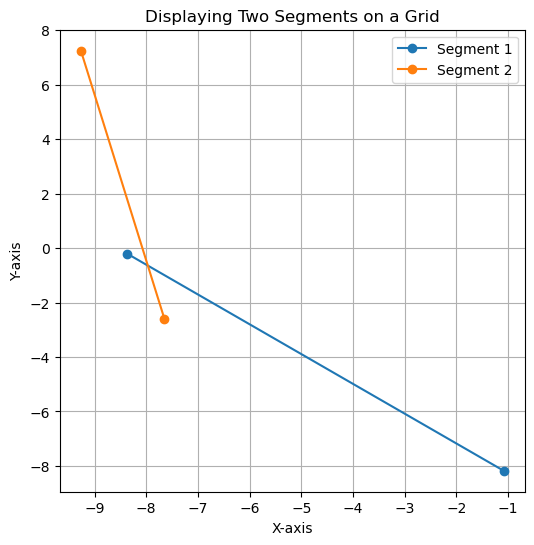

Are the segments crossing?  True


In [395]:
import matplotlib.pyplot as plt
import random


def display_segments(p1, p2, p3, p4):

    # Extracting coordinates for the segments
    x_values_segment1 = [p1[0], p2[0]]
    y_values_segment1 = [p1[1], p2[1]]

    x_values_segment2 = [p3[0], p4[0]]
    y_values_segment2 = [p3[1], p4[1]]

    # Create a plot
    plt.figure(figsize=(6, 6))

    # Plotting the segments
    plt.plot(x_values_segment1, y_values_segment1, label='Segment 1', marker='o')
    plt.plot(x_values_segment2, y_values_segment2, label='Segment 2', marker='o')

    # Set plot labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Displaying Two Segments on a Grid')

    # Add legend
    plt.legend()

    # Show grid
    plt.grid(True)

    # Show plot
    plt.show()

# Example points represented by tuples (x, y)
point1 = (random.uniform(-10, 10), random.uniform(-10, 10))
point2 = (random.uniform(-10, 10), random.uniform(-10, 10))
point3 = (random.uniform(-10, 10), random.uniform(-10, 10))
point4 = (random.uniform(-10, 10), random.uniform(-10, 10))

# Display the segments based on the given points
display_segments(point1, point2, point3, point4)

print("Are the segments crossing? ",intersect (point1,point2,point3,point4))

In [396]:
#Give a name to avery point. Creates a dictionnary with names as key associated to point coordinates
def name2coord(object_edges, GandS):
    point_names = {}  # Dictionary to map points to unique names
    j = 0

    for obj_id, points_list in object_edges.items():
        for point in points_list:
            point_names[f'P{j}'] = point
            j += 1
    point_names['S']=GandS['start']
    point_names['G']=GandS['goal']
    return point_names

#Creates a dictionnary with object name as key associated to a list of points names belonging to object
def object_ptsname(object_edges):
    point_names = {}  # Dictionary to map points to unique names
    j = 0  # Starting point index

    for obj_id, points_list in object_edges.items():
        point_names[obj_id] = []  # Initialize a list to store point names for each object
        for _ in points_list:
            point_names[obj_id].append(f'P{j}')  # Append individual point names to the list
            j += 1

    return point_names


point_names = name2coord(object_edges, SandG)
point_objects = object_ptsname(object_edges)
for obj_id, points in point_names.items():
    print(f"{obj_id}: {points}")

for obj_id, points in point_objects.items():
    print(f"{obj_id}: {points}")

P0: (-40.167784543385054, -1.2061377199042411)
P1: (12.13744406942132, 24.39098750459297)
P2: (8.29176353256885, -19.57037599927688)
P3: (-35.954971322556574, 0.6625829354861992)
P4: (-20.925128050265418, -26.325410393007143)
P5: (-48.90332823362026, 16.268157540897107)
P6: (-32.001274603351064, -48.64195864201905)
P7: (-47.71963444348022, 31.032480079623454)
P8: (-43.712225631713544, 0.8488371884437171)
P9: (-39.351987348932724, -17.900619323854038)
P10: (28.49506533472362, 18.355770269361045)
P11: (16.906679837198794, -42.30030058675159)
P12: (-7.020940311693181, -30.40333898873978)
S: (-36.83788265901558, -40.37224017681024)
G: (-15.111476790186607, 39.934069771507836)
Object_0: ['P0', 'P1', 'P2', 'P3', 'P4']
Object_1: ['P5', 'P6', 'P7', 'P8', 'P9']
Object_2: ['P10', 'P11', 'P12']


P0
P1
P2
P3
P4
P5
P6
P7
P8
P9
P10
P11
P12


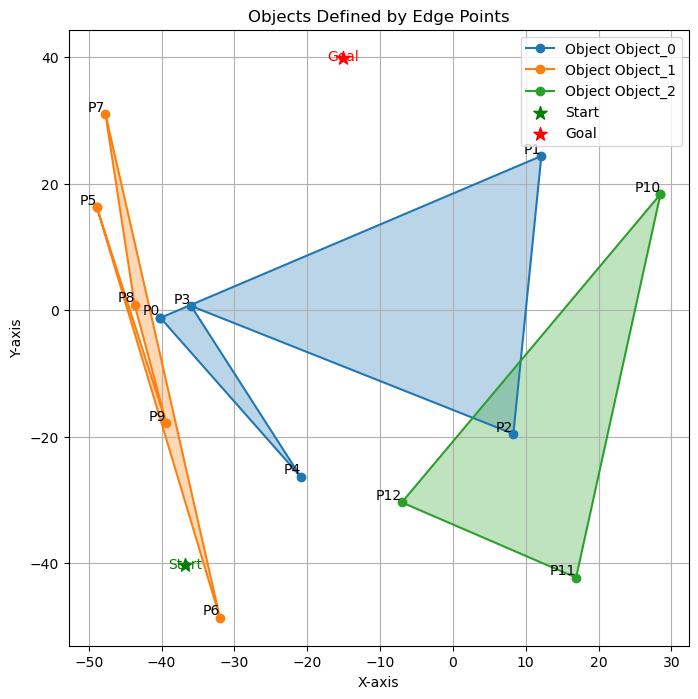

In [397]:
import matplotlib.pyplot as plt
import copy

def plot_objects(object_edges, GandS):
    object_edges_copy = copy.deepcopy(object_edges)
    point_names = name2coord(object_edges_copy, SandG)
    plt.figure(figsize=(8, 8))
    
    coordinate_to_name = {v: k for k, v in point_names.items()}
    for obj_id, points in object_edges_copy.items():
        if isinstance(points, list):
            # Edge points: List of tuples
            x_values = [point[0] for point in points]
            y_values = [point[1] for point in points]

            # Check if the first and last points are the same to close the shape
            if points[0] != points[-1]:
                points.append(points[0])  # Append the first point at the end to close the shape

            # Update x and y values after closing the shape
            x_values = [point[0] for point in points]
            y_values = [point[1] for point in points]

            # Plot the points representing the edges of the object
            plt.plot(x_values, y_values, label=f'Object {obj_id}', marker='o')

            # Fill the shape defined by the points for each object
            plt.fill(x_values, y_values, alpha=0.3)

            # Label each point on the plot with its assigned name (Pi)
            for i in range(0, len(points)-1):
                plt.text(points[i][0], points[i][1], coordinate_to_name[points[i]], color='black', ha='right', va='bottom')
                print(coordinate_to_name[points[i]])

    # Plot the Start and Goal points
    plt.scatter(point_names['S'][0], point_names['S'][1], color='green', label='Start', s=100, marker='*', zorder=3)
    plt.text(point_names['S'][0], point_names['S'][1] - 0.5, 'Start', color='green', ha='center')

    plt.scatter(point_names['G'][0], point_names['G'][1], color='red', label='Goal', s=100, marker='*', zorder=3)
    plt.text(point_names['G'][0], point_names['G'][1] - 0.5, 'Goal', color='red', ha='center')

    # Set plot labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Objects Defined by Edge Points')

    # Add legend
    plt.legend()

    # Show grid
    plt.grid(True)

    # Show plot
    plt.show()


plot_objects(object_edges, SandG)


In [398]:
def is_connected(point1, point2, object_edges):
    point_names = name2coord(object_edges, SandG)
    coordinate_to_name = {v: k for k, v in point_names.items()}
    point_objects = object_ptsname(object_edges)
    
    #if point1 and point2 are in same object but not adjacent return  false
    P1= coordinate_to_name[point1] #P1 is the name of the point1
    P2= coordinate_to_name[point2] #P2 is the name of the point2
    for object, points in point_objects.items():
        if P1 in points and P2 in points:
            if abs(points.index(P1)-points.index(P2))==1:
                return True
            if points.index(P1)==len(points)-1 and points.index(P2)==0:
                return True
            if points.index(P2)==len(points)-1 and points.index(P1)==0:
                return True
            return False
        
    #We go through all abject and check if the line between point1 and point2 
    #intersect with any of the vertices of an object
    for object, points in object_edges.items():
        #print("object: ", object)
        for j in range(len(points)):
            #print("j= ", j)
            #print("len(points) = ", len(points))
            if j == (len(points) - 1):
                #print("point",coordinate_to_name[points[j]])
                if intersect(point1, point2, points[j], points[0]):
                    print("intersection between",coordinate_to_name[point1],coordinate_to_name[point2], " and ", coordinate_to_name[points[j]],coordinate_to_name[points[0]])
                    return False
                #print("no intersection")
            else:
                if points[j] == point1 or points[j+1] == point2:
                    #print("continue: ", coordinate_to_name[point1], coordinate_to_name[point2], coordinate_to_name[points[j]], coordinate_to_name[points[j+1]])
                    continue
                    
                else:
                    if intersect(point1, point2, points[j], points[j + 1]):
                        return False
    return True


print("is connected: " ,is_connected(point_names['P4'], point_names['P2'], object_edges))
print("intersection: ", intersect(point_names['P4'], point_names['P2'], point_names['P3'], point_names['P0']))

def generate_adjacency_list(object_edges):
    point_names = name2coord(object_edges, SandG)
    point_objects = object_ptsname(object_edges)
    coordinate_to_name = {v: k for k, v in point_names.items()}
    adjacency_list = {}

    for P1, coord1 in point_names.items():
        adjacency_list[P1] = []
        for P2, coord2 in point_names.items():
            if P1 != P2:
                if is_connected(coord1, coord2, object_edges):
                    adjacency_list[P1].append(P2)
    return adjacency_list

adjacency_list = generate_adjacency_list(object_edges)
for point, connected_points in adjacency_list.items():
    print(f"{point}: {connected_points}")

is connected:  False
intersection:  False
intersection between P1 P11  and  P12 P10
intersection between P3 P6  and  P4 P0
intersection between P3 P9  and  P4 P0
intersection between P3 P11  and  P12 P10
intersection between P3 S  and  P4 P0
intersection between P6 P3  and  P4 P0
intersection between P9 P3  and  P4 P0
intersection between P11 P1  and  P12 P10
intersection between P11 P3  and  P12 P10
intersection between S P3  and  P4 P0
P0: ['P1', 'P4', 'P6', 'P7', 'G']
P1: ['P0', 'P2', 'P7', 'P10', 'G']
P2: ['P1', 'P3', 'P10', 'P11', 'P12']
P3: ['P2', 'P4', 'P12']
P4: ['P0', 'P3', 'P6', 'P11', 'P12']
P5: ['P6', 'P9', 'S']
P6: ['P0', 'P4', 'P5', 'P7', 'P11', 'P12', 'S']
P7: ['P0', 'P1', 'P6', 'P8', 'G']
P8: ['P7', 'P9']
P9: ['P5', 'P8']
P10: ['P1', 'P2', 'P11', 'P12', 'G']
P11: ['P2', 'P4', 'P6', 'P10', 'P12']
P12: ['P2', 'P3', 'P4', 'P6', 'P10', 'P11']
S: ['P5', 'P6']
G: ['P0', 'P1', 'P7', 'P10']


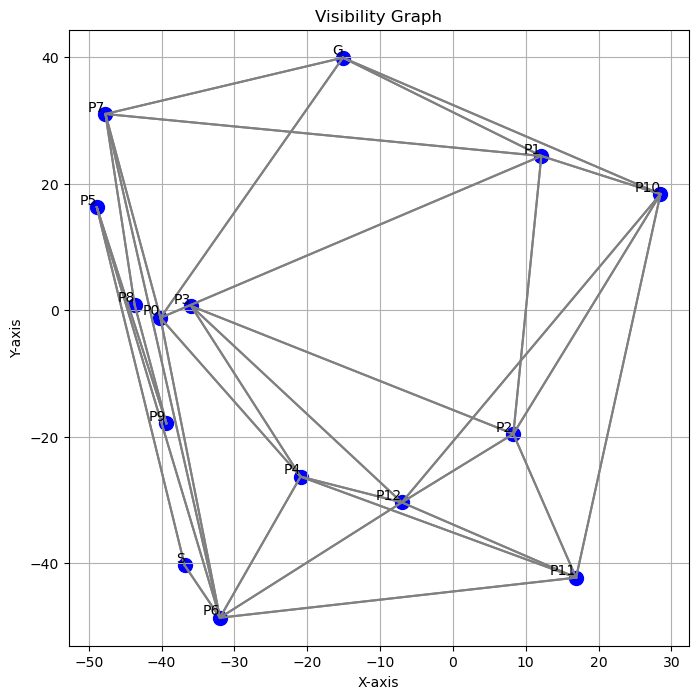

In [399]:
import matplotlib.pyplot as plt

def plot_visibility_graph(adjacency_list, point_names):
    plt.figure(figsize=(8, 8))

    # Plotting points with their names
    for point_name, coordinates in point_names.items():
        plt.scatter(coordinates[0], coordinates[1], color='blue', s=100)
        plt.text(coordinates[0], coordinates[1], point_name, color='black', ha='right', va='bottom')

    # Connecting points based on adjacency list
    for point, connected_points in adjacency_list.items():
        for connected_point in connected_points:
            # Get coordinates for the connecting points
            x_values = [point_names[point][0], point_names[connected_point][0]]
            y_values = [point_names[point][1], point_names[connected_point][1]]

            # Plot line between connected points
            plt.plot(x_values, y_values, color='gray')

    # Set plot labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Visibility Graph')

    # Show grid
    plt.grid(True)

    # Show plot
    plt.show()

plot_visibility_graph(adjacency_list, point_names)

In [400]:
from math import sqrt

def compute_dist(point1, point2):
    return sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def calculate_distances(adjacency_list, point_names):
    distances = {}  # Dictionary to store distances between connected points

    for point, connected_points in adjacency_list.items():
        for connected_point in connected_points:
            # Calculate distance using Euclidean distance formula
            distance = compute_dist(point_names[point], point_names[connected_point])
            
            # Store the distance in the distances dictionary
            distances[(point, connected_point)] = distance
            distances[(connected_point, point)] = distance  # Assuming distances are bidirectional
    
    return distances


distances = calculate_distances(adjacency_list, point_names)

print(distances)

{('P0', 'P1'): 58.23272069890373, ('P1', 'P0'): 58.23272069890373, ('P0', 'P4'): 31.642656154910473, ('P4', 'P0'): 31.642656154910473, ('P0', 'P6'): 48.133657570930744, ('P6', 'P0'): 48.133657570930744, ('P0', 'P7'): 33.111310975822015, ('P7', 'P0'): 33.111310975822015, ('P0', 'G'): 48.169858113341284, ('G', 'P0'): 48.169858113341284, ('P1', 'P2'): 44.129250389179575, ('P2', 'P1'): 44.129250389179575, ('P1', 'P7'): 60.224407607911296, ('P7', 'P1'): 60.224407607911296, ('P1', 'P10'): 17.435470183952898, ('P10', 'P1'): 17.435470183952898, ('P1', 'G'): 31.370226240326343, ('G', 'P1'): 31.370226240326343, ('P2', 'P3'): 48.65332642888439, ('P3', 'P2'): 48.65332642888439, ('P2', 'P10'): 42.97168805736015, ('P10', 'P2'): 42.97168805736015, ('P2', 'P11'): 24.30774063314125, ('P11', 'P2'): 24.30774063314125, ('P2', 'P12'): 18.757184920801688, ('P12', 'P2'): 18.757184920801688, ('P3', 'P4'): 30.89090436825113, ('P4', 'P3'): 30.89090436825113, ('P3', 'P12'): 42.45314659173933, ('P12', 'P3'): 42.4

In [401]:
import copy


def get_distance(distances, point1, point2):
    for points, dist in distances.items():
        if points[0] == point1 and points[1] == point2:
            return dist


def dijkstra(adjacency_list, point_names):
    shortest_dist = {} #store the best-known cost of visiting each point in the graph starting from start
    previous_nodes = {} #store the trajectory of the current best known path for each node
    unvisited_nodes = list(point_names.keys())
    distances = calculate_distances(adjacency_list, point_names)
    # We need to set every distance to infinity. We will simulate that using a very large value     
    infinity = 10e10
    for node in point_names.keys():
        shortest_dist[node] = infinity
        shortest_dist['S'] = 0

    while unvisited_nodes:
        current_min_node = unvisited_nodes[0]
        for node in unvisited_nodes: # Iterate over the nodes
            if shortest_dist[node] < shortest_dist[current_min_node]:
                current_min_node = node
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = adjacency_list[current_min_node]
        for neighbor in neighbors:
            test = shortest_dist[current_min_node] + get_distance(distances,current_min_node, neighbor)
            if test < shortest_dist[neighbor]:
                shortest_dist[neighbor] = test
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
        unvisited_nodes.remove(current_min_node)

    return previous_nodes, shortest_dist

print(dijkstra(adjacency_list, point_names))

def find_path(adjacency_list, point_names):
    dist = 0
    previous_nodes, shortest_dist = dijkstra(adjacency_list, point_names)
    path = ['G']
    current_node = 'G'
    while current_node != 'S':
        current_node = previous_nodes[current_node]
        path.append(current_node)
    path.reverse()
    return path

print(find_path(adjacency_list, point_names))
shortest_path=find_path(adjacency_list, point_names)


({'P5': 'S', 'P6': 'S', 'P0': 'P6', 'P4': 'P6', 'P7': 'P6', 'P11': 'P6', 'P12': 'P6', 'P3': 'P4', 'P2': 'P12', 'P10': 'P12', 'P1': 'P2', 'G': 'P0', 'P9': 'P5', 'P8': 'P9'}, {'P0': 57.71389874628403, 'S': 0, 'P1': 103.3966675648671, 'P2': 59.26741717568753, 'P3': 65.38518472266784, 'P4': 34.49428035441671, 'P5': 57.91122197410287, 'P6': 9.580241175353283, 'P7': 90.79035767368464, 'P8': 112.63962929143423, 'P9': 93.38985533460108, 'P10': 100.83300898739148, 'P11': 58.897627911157116, 'P12': 40.510232254885835, 'G': 105.88375685962532})
['S', 'P6', 'P0', 'G']


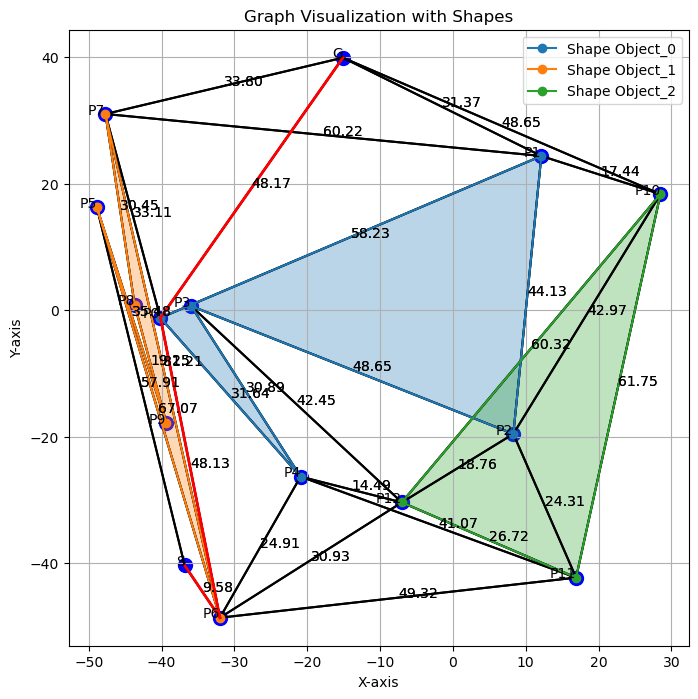

In [402]:
import matplotlib.pyplot as plt

def plot_graph_with_shapes(adjacent_list, point_names, distances, shortest_path, object_edges):
    plt.figure(figsize=(8, 8))

    # Plotting all points and their names
    for point, coordinates in point_names.items():
        plt.scatter(coordinates[0], coordinates[1], color='blue', s=100)
        plt.text(coordinates[0], coordinates[1], point, ha='right')

    # Plotting edges with distances
    for start_point, connected_points in adjacent_list.items():
        for end_point in connected_points:
            if (start_point, end_point) in distances:
                distance = distances[(start_point, end_point)]
                start_coord = point_names[start_point]
                end_coord = point_names[end_point]
                plt.plot([start_coord[0], end_coord[0]], [start_coord[1], end_coord[1]], 'k-')
                plt.text((start_coord[0] + end_coord[0]) / 2, (start_coord[1] + end_coord[1]) / 2, f'{distance:.2f}', color='black')

    # Plotting shapes
    for obj_id, points in object_edges.items():
        if isinstance(points, list):
            # Edge points: List of tuples
            x_values = [point[0] for point in points]
            y_values = [point[1] for point in points]

            # Check if the first and last points are the same to close the shape
            if points[0] != points[-1]:
                points.append(points[0])  # Append the first point at the end to close the shape

            # Update x and y values after closing the shape
            x_values = [point[0] for point in points]
            y_values = [point[1] for point in points]

            # Plot the points representing the edges of the object
            plt.plot(x_values, y_values, label=f'Shape {obj_id}', marker='o')

            # Fill the shape defined by the points for each object
            plt.fill(x_values, y_values, alpha=0.3)
        
    # Highlighting shortest path in red
    for i in range(len(shortest_path) - 1):
        start_point = point_names[shortest_path[i]]
        end_point = point_names[shortest_path[i + 1]]
        plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 'r-', linewidth=2)


    # Set plot labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Graph Visualization with Shapes')

    # Add legend
    plt.legend()

    # Show grid
    plt.grid(True)

    # Show plot
    plt.show()
plot_graph_with_shapes(adjacency_list, point_names, distances, shortest_path, object_edges)